

[1]
[0]
Naive Bayes  Accuracy : 
 90.92850580536762 %
 Completion Speed 0.43783

Decision tree Accuracy : 
 95.59843790031522 %
 Completion Speed 2.59772

Support vector machine Accuracy : 
 50.0 %
 Completion Speed 17.7576

Kneighborsclassifier Accuracy : 
 83.09126398389976 %
 Completion Speed 3.20672

Random Forest Accuracy : 
 45.46752896889404 %
 Completion Speed 0.31312


Input your tweet : 
It's time to just be happy

*****************
Positive
*****************


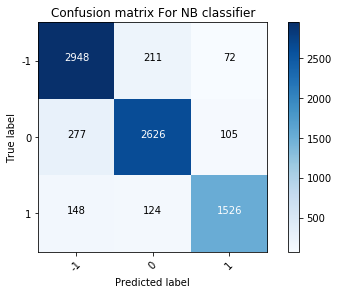

In [4]:
import warnings
warnings.filterwarnings('ignore')

import json
import pandas as pd
import time
import xlrd
import numpy as np
import itertools
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
#from sklearn.metrics import roc_auc_score

tweets_data = []
x = []
y = []
vectorizer = CountVectorizer(stop_words='english')

def retrieveTweet(data_url):

    tweets_data_path = data_url
    tweets_file = open(tweets_data_path, "r")
    for line in tweets_file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue

             
def retrieveProcessedData(Pdata_url):
    sent = pd.read_excel(Pdata_url)
    for i in range(len(tweets_data)):
        if tweets_data[i]['id']==sent['id'][i]:
            x.append(tweets_data[i]['text'])
            y.append(sent['sentiment'][i])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')          
            
            
def nbTrain():
    from sklearn.naive_bayes import MultinomialNB
    start_timenb = time.time()
    train_features = vectorizer.fit_transform(x)
    
    actual = y
    
    nb = MultinomialNB()
    nb.fit(train_features, [int(r) for r in y])
    
    test_features = vectorizer.transform(x)
    predictions = nb.predict(test_features)
    fpr, tpr, thresholds = metrics.roc_curve(actual, predictions, pos_label=1)
    nbscore = format(metrics.auc(fpr, tpr))
    nbscore = float(nbscore)*100
    
    nb_matrix = confusion_matrix(actual, predictions)
    plt.figure()
    plot_confusion_matrix(nb_matrix, classes=[-1,0,1], title='Confusion matrix For NB classifier')
    
    print("\n")
    
    test_try= vectorizer.transform(["Lets help those in need, fight anxiety and bring happiness"])
    test_try2= vectorizer.transform(["Dont look down at people with anxiety rather give love and respect to all. shout! Equality."])
    predictr = nb.predict(test_try)
    predictt = nb.predict(test_try2)
    
    
    print(predictr)
    print(predictt)

    print("Naive Bayes  Accuracy : \n", nbscore,"%")
    print(" Completion Speed", round((time.time() - start_timenb),5))
    print()

def datree():
    from sklearn import tree
    start_timedt = time.time()
    train_featurestree = vectorizer.fit_transform(x)
    actual1 = y
    test_features1 = vectorizer.transform(x)
    dtree = tree.DecisionTreeClassifier()
    
    dtree = dtree.fit(train_featurestree, [int(r) for r in y])
    
    prediction1 = dtree.predict(test_features1)
    ddd, ttt, thresholds = metrics.roc_curve(actual1, prediction1, pos_label=1)
    dtreescore = format(metrics.auc(ddd, ttt))
    dtreescore = float(dtreescore)*100
    print("Decision tree Accuracy : \n", dtreescore, "%")
    print(" Completion Speed", round((time.time() - start_timedt),5))
    print()

def Tsvm():
    from sklearn.svm import SVC
    start_timesvm = time.time()
    train_featuressvm = vectorizer.fit_transform(x)
    actual2 = y
    test_features2 = vectorizer.transform(x)
    svc = SVC()
    
    svc = svc.fit(train_featuressvm, [int(r) for r in y])
    prediction2 = svc.predict(test_features2)
    sss, vvv, thresholds = metrics.roc_curve(actual2, prediction2, pos_label=1)
    svc = format(metrics.auc(sss, vvv))
    svc = float(svc)*100
    print("Support vector machine Accuracy : \n", svc, "%")
    print(" Completion Speed", round((time.time() - start_timesvm),5))
    print()

def knN():
    from sklearn.neighbors import KNeighborsClassifier
    start_timekn = time.time()
    train_featureskn = vectorizer.fit_transform(x)
    actual3 = y
    test_features3 = vectorizer.transform(x)
    kn = KNeighborsClassifier(n_neighbors=2)
    
    
    kn = kn.fit(train_featureskn, [int(i) for i in y])
    prediction3 = kn.predict(test_features3)
    kkk, nnn, thresholds = metrics.roc_curve(actual3, prediction3, pos_label=1)
    kn = format(metrics.auc(kkk, nnn))
    kn = float(kn)*100
    
    print("Kneighborsclassifier Accuracy : \n", kn, "%")
    print(" Completion Speed", round((time.time() - start_timekn),5))
    print()

def RanFo():
    from sklearn.ensemble import RandomForestClassifier
    start_timerf = time.time()
    train_featuresrf = vectorizer.fit_transform(x)
    actual4 = y
    test_features4 = vectorizer.transform(x)
    rf = RandomForestClassifier(max_depth=2, random_state=0)
    
    
    rf = rf.fit(train_featuresrf, [int(i) for i in y])
    prediction4 = rf.predict(test_features4)
    rrr, fff, thresholds = metrics.roc_curve(actual4, prediction4, pos_label=1)
    kn = format(metrics.auc(rrr, fff))
    kn = float(kn)*100
    print("Random Forest Accuracy : \n", kn, "%")
    print(" Completion Speed", round((time.time() - start_timerf),5))
    print()
    print()


def runall():     
    retrieveTweet('C:\\Users\\CHITRANG\\Desktop\\Sem-6\\Depression\\dep_tweet.txt')  
    retrieveProcessedData('C:\\Users\\CHITRANG\\Desktop\\Sem-6\\Depression\\dep_output.xlsx')
    nbTrain()
    datree()
    Tsvm()
    knN()
    RanFo()
    
def datreeINPUT(inputtweet):
    from sklearn import tree
    train_featurestree = vectorizer.fit_transform(x)
    dtree = tree.DecisionTreeClassifier()
    
    dtree = dtree.fit(train_featurestree, [int(r) for r in y])
    
    
    inputdtree= vectorizer.transform([inputtweet])
    predictt = dtree.predict(inputdtree)
    
    if predictt == 1:
        predictt = "Positive"
    elif predictt == 0:
        predictt = "Neutral"
    elif predictt == -1:
        predictt = "Negative"
    else:
        print("Nothing")
    
    print("\n*****************")
    print(predictt)
    
    print("*****************")

runall()

print("Input your tweet : ")
inputtweet = input()

datreeINPUT(inputtweet)
